# Text and face detection with OpenCV, PyTesseract and Pillow

In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

In [ ]:
!pip install tesseract tesseract-ocr pytesseract

In [25]:
import zipfile

from PIL import Image
from PIL import ImageDraw
from math import ceil
import pytesseract
import cv2 as cv
import numpy as np

In [26]:
# --------------------- Methods --------------------------

# Manually improved OCR function
def improved_OCR(input_img, tvalue):
  # Converting image to black & white image
  output_img = input_img.convert("L")
  # Binarizing the image
  for x in range(output_img.width):
    for y in range(output_img.height):
      if output_img.getpixel((x, y)) < tvalue:
        output_img.putpixel((x, y), 0)
      else:
        output_img.putpixel((x, y), 255)
  # Resizing image
  wsize = 600
  wp = wsize/output_img.size[0]
  hsize = int(output_img.size[1]*wp)
  output_img.resize((wsize, hsize), Image.ANTIALIAS)
  # Returning the output image for detecting texts 
  return output_img


  # Cropping faces to image board
def detected_faces(img, faces):
    faces_img = []
    for (x, y, w, h) in faces:
        im = img.crop((x, y, w+x, h+y))
        im = im.resize((100, 100), Image.ANTIALIAS)
        faces_img.append(im)
    row = int(ceil(faces.__len__()/5))
    column = 5
    img_board = Image.new("RGB", (column*100, row*100))
    x = 0
    y = 0
    for im in faces_img:
        img_board.paste(im, (x, y))
        if x+100 == img_board.width:
            x = 0
            y += 100
        else:
            x += 100
    display(img_board)
    return

Enter image zip location: Images.zip
Input keyword to search: Trump

Results found in file 1.png


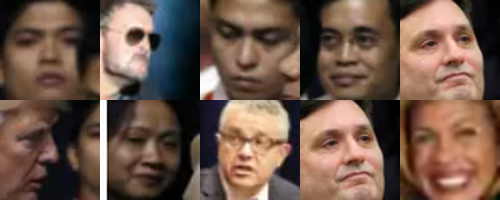

Result not found in file 2.png


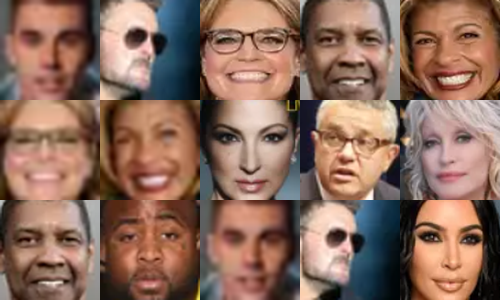

Result not found in file 3.png


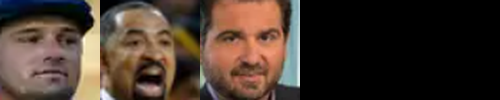

Results found in file 4.png
But there were no faces in that file!


In [28]:
# loading the face detection classifier
face_cascade = cv.CascadeClassifier("readonly/haarcascade_frontalface_default.xml")

# Image zip location
inp_imgs_zip = str(input("Enter image zip location: "))

# Input Keyword
inp_text = str(input("Input keyword to search: ")).lower()
print()

# Open ZipFile and content's in it
images_zip = zipfile.ZipFile(inp_imgs_zip, "r")
images = images_zip.namelist()

for img in images:
    image = images_zip.open(img, "r")
    image = Image.open(image).convert("RGB")
    nm_image = np.array(image)

    # Detecting text in image
    result = pytesseract.image_to_string(improved_OCR(image, 128)).lower()
    if inp_text in result:
        print("Results found in file {}".format(img))
    else:
        print("Result not found in file {}".format(img))

    # Detect faces
    cv_img = cv.cvtColor(nm_image, cv.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(cv_img, scaleFactor=1.3, minNeighbors=5)
    faces = np.array(faces).tolist()

    if faces.__len__() != 0:
        detected_faces(image, faces)
    else:
        print("But there were no faces in that file!")